In [6]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import warnings
import sklearn
%matplotlib inline

warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

true_data = pd.read_csv('/content/drive/MyDrive/AI_Phase3/True.csv')
fake_data = pd.read_csv('/content/drive/MyDrive/AI_Phase3/Fake.csv')

true_data['Target'] = ['True'] * len(true_data)
fake_data['Target'] = ['Fake'] * len(fake_data)

# Concatenate the data frames using pd.concat
data = pd.concat([true_data, fake_data]).sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()


(44898, 5)


,title,text,subject,date,Target
0,Trump says he has decided to decertify Iran nu...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"October 13, 2017",True
1,FLASHBACK! BILL CLINTON: “I did not have sexua...,,left-news,"Oct 8, 2016",Fake
2,MUSLIM ASSIMILATION UPDATE: Migrants Arrested ...,This is a story is for anyone who thinks these...,politics,"Jan 16, 2016",Fake
3,Trump trails Clinton by 8 points after tape sc...,NEW YORK (Reuters) - Donald Trump has fallen f...,politicsNews,"October 11, 2016",True
4,WATCH: Morning Joe Hosts Urge Republicans To ...,"If Republicans listen to this sage advice, Don...",News,"March 21, 2017",Fake


In [9]:
data['title'][0]


'Trump says he has decided to decertify Iran nuclear deal'

In [10]:
data['text'][0]

'WASHINGTON (Reuters) - U.S. President Donald Trump struck a blow against the 2015 Iran nuclear agreement on Friday in defiance of other world powers, choosing not to certify that Tehran is complying with the deal.  Based on the factual record I have put forward, I am announcing today that we cannot and will not make this certification,  Trump said at a White House event as he unveiled a tougher strategy against Tehran. Trump s move does not pull the United States out of the agreement, formally known as the JCPOA. '

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [12]:
#preprocessing
#drop null values
data=data.dropna(axis=0)

In [13]:
len(data)

44898

In [14]:
#converting all strings to lowercase
data['clean_news']=data['text'].str.lower()
data['clean_news']

0        washington (reuters) - u.s. president donald t...
1                                                         
2        this is a story is for anyone who thinks these...
3        new york (reuters) - donald trump has fallen f...
4        if republicans listen to this sage advice, don...
                               ...                        
44893    now, something is definitely off with trump fa...
44894    what do hillary s emails and police murders of...
44895    washington (reuters) - without action by congr...
44896    sarah huckabee sanders has taken control of th...
44897    share this with every offended snowflake in am...
Name: clean_news, Length: 44898, dtype: object

In [15]:
#removing special characters , extra spaces and escape characters
data['clean_news']=data['clean_news'].str.replace('[^A-Za-z0-9\s]','')
data['clean_news']=data['clean_news'].str.replace('[\n]','')
data['clean_news']=data['clean_news'].str.replace('[\s+]',' ')
data['clean_news']

0        washington reuters  us president donald trump ...
1                                                         
2        this is a story is for anyone who thinks these...
3        new york reuters  donald trump has fallen furt...
4        if republicans listen to this sage advice dona...
                               ...                        
44893    now something is definitely off with trump fam...
44894    what do hillary s emails and police murders of...
44895    washington reuters  without action by congress...
44896    sarah huckabee sanders has taken control of th...
44897    share this with every offended snowflake in am...
Name: clean_news, Length: 44898, dtype: object

In [16]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
#remove stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
data['clean_news']=data['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
data.head()

,title,text,subject,date,Target,clean_news
0,Trump says he has decided to decertify Iran nu...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"October 13, 2017",True,washington reuters us president donald trump s...
1,FLASHBACK! BILL CLINTON: “I did not have sexua...,,left-news,"Oct 8, 2016",Fake,
2,MUSLIM ASSIMILATION UPDATE: Migrants Arrested ...,This is a story is for anyone who thinks these...,politics,"Jan 16, 2016",Fake,story anyone thinks muslim migrants going chan...
3,Trump trails Clinton by 8 points after tape sc...,NEW YORK (Reuters) - Donald Trump has fallen f...,politicsNews,"October 11, 2016",True,new york reuters donald trump fallen behind hi...
4,WATCH: Morning Joe Hosts Urge Republicans To ...,"If Republicans listen to this sage advice, Don...",News,"March 21, 2017",Fake,republicans listen sage advice donald trump wo...


In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
#Tokenization
from nltk.tokenize import word_tokenize
data['tokenized_news'] = data['clean_news'].apply(lambda x: word_tokenize(x))
data.head()

,title,text,subject,date,Target,clean_news,tokenized_news
0,Trump says he has decided to decertify Iran nu...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"October 13, 2017",True,washington reuters us president donald trump s...,"[washington, reuters, us, president, donald, t..."
1,FLASHBACK! BILL CLINTON: “I did not have sexua...,,left-news,"Oct 8, 2016",Fake,,[]
2,MUSLIM ASSIMILATION UPDATE: Migrants Arrested ...,This is a story is for anyone who thinks these...,politics,"Jan 16, 2016",Fake,story anyone thinks muslim migrants going chan...,"[story, anyone, thinks, muslim, migrants, goin..."
3,Trump trails Clinton by 8 points after tape sc...,NEW YORK (Reuters) - Donald Trump has fallen f...,politicsNews,"October 11, 2016",True,new york reuters donald trump fallen behind hi...,"[new, york, reuters, donald, trump, fallen, be..."
4,WATCH: Morning Joe Hosts Urge Republicans To ...,"If Republicans listen to this sage advice, Don...",News,"March 21, 2017",Fake,republicans listen sage advice donald trump wo...,"[republicans, listen, sage, advice, donald, tr..."


In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_text(tokens, lemmatizer):
    return [lemmatizer.lemmatize(token) for token in tokens]
data['lemmatized_news'] = data['tokenized_news'].apply(lambda x: lemmatize_text(x, lemmatizer))
data.head()

,title,text,subject,date,Target,clean_news,tokenized_news,lemmatized_news
0,Trump says he has decided to decertify Iran nu...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"October 13, 2017",True,washington reuters us president donald trump s...,"[washington, reuters, us, president, donald, t...","[washington, reuters, u, president, donald, tr..."
1,FLASHBACK! BILL CLINTON: “I did not have sexua...,,left-news,"Oct 8, 2016",Fake,,[],[]
2,MUSLIM ASSIMILATION UPDATE: Migrants Arrested ...,This is a story is for anyone who thinks these...,politics,"Jan 16, 2016",Fake,story anyone thinks muslim migrants going chan...,"[story, anyone, thinks, muslim, migrants, goin...","[story, anyone, think, muslim, migrant, going,..."
3,Trump trails Clinton by 8 points after tape sc...,NEW YORK (Reuters) - Donald Trump has fallen f...,politicsNews,"October 11, 2016",True,new york reuters donald trump fallen behind hi...,"[new, york, reuters, donald, trump, fallen, be...","[new, york, reuters, donald, trump, fallen, be..."
4,WATCH: Morning Joe Hosts Urge Republicans To ...,"If Republicans listen to this sage advice, Don...",News,"March 21, 2017",Fake,republicans listen sage advice donald trump wo...,"[republicans, listen, sage, advice, donald, tr...","[republican, listen, sage, advice, donald, tru..."


In [22]:
def return_sentences(tokenized_news):
    return " ".join([word for word in tokenized_news])

In [23]:
data['clean_text'] = data['lemmatized_news'].apply(lambda x : return_sentences(x))
data.head()

,title,text,subject,date,Target,clean_news,tokenized_news,lemmatized_news,clean_text
0,Trump says he has decided to decertify Iran nu...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"October 13, 2017",True,washington reuters us president donald trump s...,"[washington, reuters, us, president, donald, t...","[washington, reuters, u, president, donald, tr...",washington reuters u president donald trump st...
1,FLASHBACK! BILL CLINTON: “I did not have sexua...,,left-news,"Oct 8, 2016",Fake,,[],[],
2,MUSLIM ASSIMILATION UPDATE: Migrants Arrested ...,This is a story is for anyone who thinks these...,politics,"Jan 16, 2016",Fake,story anyone thinks muslim migrants going chan...,"[story, anyone, thinks, muslim, migrants, goin...","[story, anyone, think, muslim, migrant, going,...",story anyone think muslim migrant going change...
3,Trump trails Clinton by 8 points after tape sc...,NEW YORK (Reuters) - Donald Trump has fallen f...,politicsNews,"October 11, 2016",True,new york reuters donald trump fallen behind hi...,"[new, york, reuters, donald, trump, fallen, be...","[new, york, reuters, donald, trump, fallen, be...",new york reuters donald trump fallen behind hi...
4,WATCH: Morning Joe Hosts Urge Republicans To ...,"If Republicans listen to this sage advice, Don...",News,"March 21, 2017",Fake,republicans listen sage advice donald trump wo...,"[republicans, listen, sage, advice, donald, tr...","[republican, listen, sage, advice, donald, tru...",republican listen sage advice donald trump wou...


In [24]:
data['Target'] = [1 if x == 'Fake' else 0 for x in data['Target']]
data.head()

,title,text,subject,date,Target,clean_news,tokenized_news,lemmatized_news,clean_text
0,Trump says he has decided to decertify Iran nu...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"October 13, 2017",0,washington reuters us president donald trump s...,"[washington, reuters, us, president, donald, t...","[washington, reuters, u, president, donald, tr...",washington reuters u president donald trump st...
1,FLASHBACK! BILL CLINTON: “I did not have sexua...,,left-news,"Oct 8, 2016",1,,[],[],
2,MUSLIM ASSIMILATION UPDATE: Migrants Arrested ...,This is a story is for anyone who thinks these...,politics,"Jan 16, 2016",1,story anyone thinks muslim migrants going chan...,"[story, anyone, thinks, muslim, migrants, goin...","[story, anyone, think, muslim, migrant, going,...",story anyone think muslim migrant going change...
3,Trump trails Clinton by 8 points after tape sc...,NEW YORK (Reuters) - Donald Trump has fallen f...,politicsNews,"October 11, 2016",0,new york reuters donald trump fallen behind hi...,"[new, york, reuters, donald, trump, fallen, be...","[new, york, reuters, donald, trump, fallen, be...",new york reuters donald trump fallen behind hi...
4,WATCH: Morning Joe Hosts Urge Republicans To ...,"If Republicans listen to this sage advice, Don...",News,"March 21, 2017",1,republicans listen sage advice donald trump wo...,"[republicans, listen, sage, advice, donald, tr...","[republican, listen, sage, advice, donald, tru...",republican listen sage advice donald trump wou...


In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
from keras.models import Model
from keras.layers import Dense,Embedding,Input,LSTM, Bidirectional,GlobalMaxPool1D,Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import Sequential

In [35]:
EMBEDDING_FILE=r"/content/drive/MyDrive/AI_Phase3/glove.6B.100d.txt"
MAX_SEQUENCE_LENGTH=100
MAX_VOCAB_SIZE=20000
EMBEDDING_DIM=100
VALIDATION_SPLIT=0.2
BATCH_SIZE=32
EPOCHS=10

In [36]:
print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE) as f:
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [37]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(data['clean_text']))
X = tokenizer.texts_to_sequences(list(data['clean_text']))

# pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [38]:
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 218659 unique tokens.


In [39]:
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [40]:
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

In [41]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

Building model...
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          2000000   
                                                                 
 bidirectional (Bidirection  (None, 100, 30)           13920     
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 30)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 2013951 (7.68 MB)
Trainable p

In [43]:
from sklearn.model_selection import train_test_split
y=data['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

In [46]:
print('Training model...')
r = model.fit(
  X_train,
  y_train,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Training model...
Epoch 1/10
898/898 [==============================] - 81s 90ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.0701 - val_accuracy: 0.9802
Epoch 2/10
898/898 [==============================] - 75s 84ms/step - loss: 0.0032 - accuracy: 0.9998 - val_loss: 0.0833 - val_accuracy: 0.9800
Epoch 3/10
898/898 [==============================] - 91s 101ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.1015 - val_accuracy: 0.9705
Epoch 4/10
898/898 [==============================] - 74s 83ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0837 - val_accuracy: 0.9801
Epoch 5/10
898/898 [==============================] - 76s 85ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0906 - val_accuracy: 0.9781
Epoch 6/10
898/898 [==============================] - 74s 83ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9793
Epoch 7/10
898/898 [==============================] - 73s 81ms/step - loss: 9.0125e-04 - accuracy: 1.0000 - val_loss:

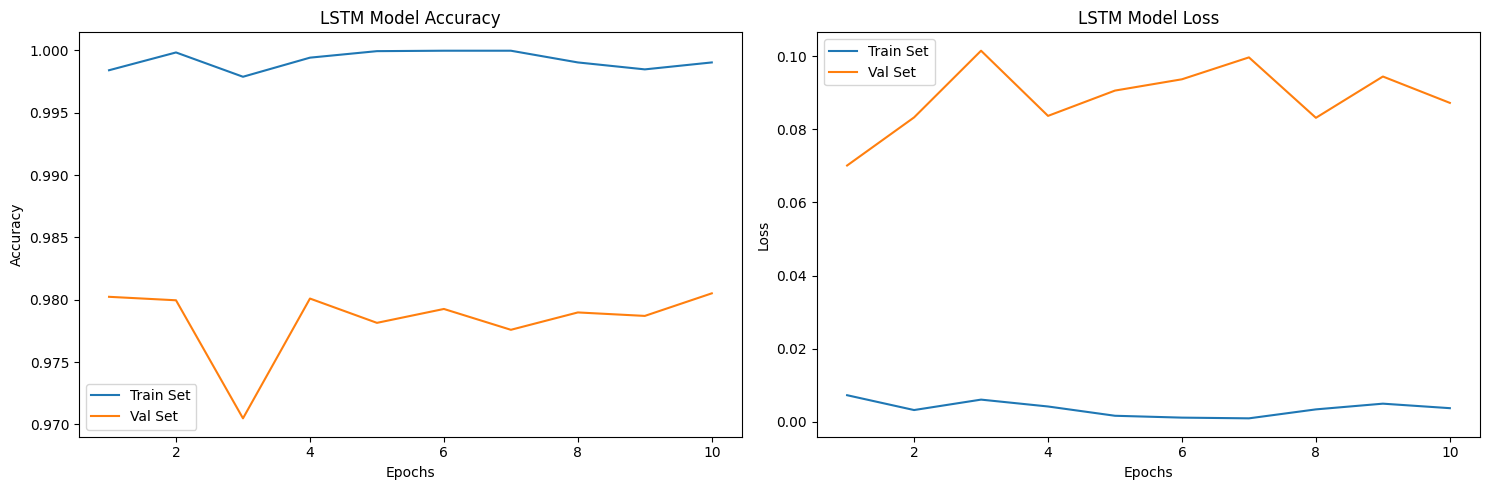

In [50]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(1, len(r.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')

plt.tight_layout()
plt.show()


In [51]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

1123/1123 [==============================] - 24s 22ms/step - loss: 0.0184 - accuracy: 0.9961
Accuracy of the model on Training Data is -  99.6074378490448
281/281 [==============================] - 6s 22ms/step - loss: 0.0740 - accuracy: 0.9835
Accuracy of the model on Testing Data is -  98.35189580917358


In [52]:
pred = model.predict(X_test)
pred[:5]

281/281 [==============================] - 9s 31ms/step


array([[1.0000000e+00],
       [2.4139799e-08],
       [9.9999994e-01],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

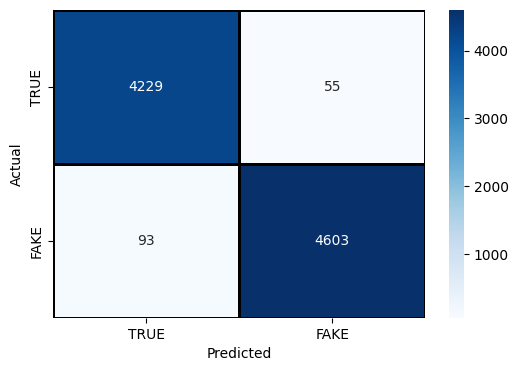

In [53]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [54]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4284
           1       0.99      0.98      0.98      4696

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [55]:
y_pred = model.predict(X_test).ravel()

281/281 [==============================] - 9s 33ms/step


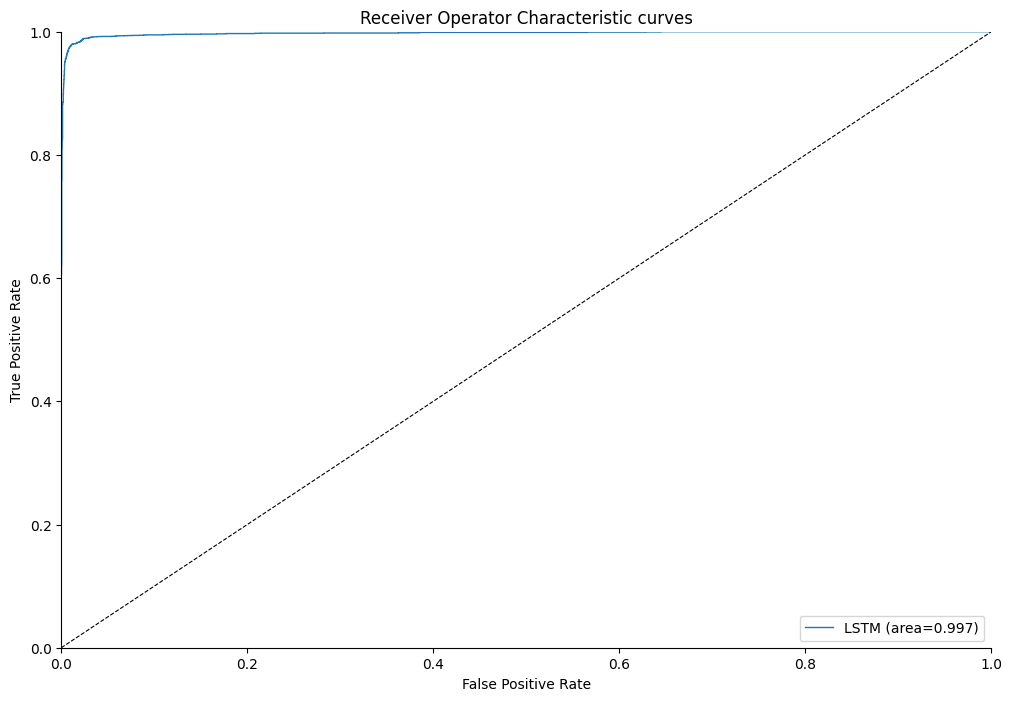

In [56]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba)))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,y_pred,label='LSTM', l='-')



ax.plot([0,1], [0,1], color='k', linewidth=0.8, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

In [57]:
testSent =["Trey Gowdy destroys this clueless DHS employee when asking about the due process of getting on the terror watch list. Her response is priceless:  I m sorry, um, there s not a process afforded the citizen prior to getting on the list.  ",
       "Poland s new prime minister faces a difficult balancing act trying to repair bruised relations with the European Union without alienating the eurosceptic government s core voters. A Western-educated former banker who is fluent in German and English and was sworn in on Monday, Mateusz Morawiecki boasts the credentials needed to negotiate with Brussels. But any compromises to improve relations with Brussels, which sees the ruling Law and Justice (PiS) party as a threat to democracy, would risk upsetting the traditional, Catholic supporters who propelled it into power two years ago. It is a gamble that could backfire, and it is not yet clear how far Morawiecki, 49, and his party, dominated by former Prime Minister Jaroslaw Kaczynski, are ready to go to please Brussels.   The idea to build up international credibility seems rational,  said Jaroslaw Flis, a sociologist at the Jagiellonian University.  But such actions would have to be in complete contrast with what Mateusz Morawiecki would have to do domestically to prevent the PiS from falling apart.  The PiS government has alienated many people at home and abroad with its nationalist rhetoric and changes to state institutions which the EU says subvert the bloc s laws. The European Commission, the EU executive, opened an inquiry into the rule of law in Poland in January 2016 and the European Parliament has started a process that could deprive Poland of its voting rights in the 28-nation bloc. Any hope in Brussels that Morawiecki s appointment signals a change of course by PiS will have been tempered by Polish parliament approving legal changes to the judiciary in defiance of the EU on Friday - the day after his nomination. The changes give parliament, where PiS has a majority, de facto control over the selection of judges. EU leaders looking for clues about Morawiecki s plans will also have taken little comfort from comments he has made since being nominated, making clear he backs a tough line on the EU and believes in PiS s traditional vision of the Polish state.   We want to transform Europe, this is my dream, to re-christianise it,  Morawiecki told the Catholic Radio Maryja broadcaster.  We want Poland to be strong, but also to contain ... Christian values. We will defend them against the background of laicisation and a deepening consumerism.  Asked by the radio interviewer about demands by French President Emmanuel Macron for Poland to face sanctions over a subversion of democratic rules, Morawiecki said he would not  bow down to blackmail.  In comments to parliament on Tuesday, Morawiecki suggested Poland might relent in a conflict with Brussels over logging in an ancient forest, which an EU court has said contravenes EU laws. But he said Poland s national interests came first in any debate over the future of the EU and that he  wholeheartedly  supported PiS s overhaul of the judiciary. Like Beata Szydlo, whom he replaced as prime minister, Morawiecki is likely to have to defer to PiS leader and co-founder Jaroslaw Kaczynski. Prime minister from July 2006 to November 2007, Kaczynski is widely seen as the power behind the party and Poland s main decision-maker. How much scope that will leave Morawiecki to carve out his own path remains to be seen. Former Polish President Lech Walesa, a PiS critic, has suggested that nothing of substance will change.  The circus has stayed the same, only the clowns have changed their roles,  Walesa, who led the Solidarity trade union movement that ended communist rule, said on Twitter.  The appointment of Morawiecki, whose father founded and led a radical offshoot of Solidarity in the 1980s, appears designed in part to present a new face of Poland to the EU. Szydlo, 54, at times responded angrily to EU criticism and relations with the bloc soured under her government. Underlining PiS opposition to Muslim immigration, she said last month Poland wanted to be sure Christian traditions were not subject to  ideological censorship  in the EU. Along with Hungary, Poland has refused to take in any of its quota of the wave of refugees from Syria and elsewhere who have come to Europe since 2015, on the grounds that Muslim immigrants are a threat to national security and stability.         Such comments appeal to core PiS voters, and Szydlo s government, which promised generous welfare payouts and a dedication to traditional Catholic values, was one of Poland s most popular since communist rule ended in 1989. A relative newcomer to politics, Morawiecki lacks Szydlo s broad appeal. But he has overseen significant economic achievements since becoming finance minister in 2016, a position he has retained in the new government. Tusk has welcomed what he sees as signs that Morawiecki is a liberal economist who wants better ties with the EU.  There is no doubt that (Morawiecki s) liberal bias and some pro-western gestures could be a sign that there is a lurking desire to improve relations,  Tusk said last week. But an economic stimulus plan Morawiecki unveiled in 2016 has been criticized by economists who say it depends heavily on private investment, which is low in Poland despite fast economic growth.  What Morawiecki sees as a solution, meaning more political influence in the economy, is actually dangerous,  said Leszek Balcerowicz, a former finance minister who coordinated the transition to a market economy after decades of communist rule. Any hint of protectionism is also likely to worry EU leaders, who seek to break down trade barriers.  Morawiecki has called the privatization of state-owned companies a tragedy and said he will give more power to domestic capital at the expense of foreign investors. In his comments to parliament on Tuesday, he said economic policy should not change.  ",
      ]

In [58]:
def cleanText(txt):
    txt = txt.lower()
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
    txt = re.sub('[^a-z]',' ',txt)
    return txt

In [59]:
def predict_text(lst_text):
    test = tokenizer.texts_to_sequences(lst_text)
    # pad sequences so that we get a N x T matrix
    testX = pad_sequences(test, maxlen=MAX_SEQUENCE_LENGTH)
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])

    prediction = model.predict(testX)
    df_test['prediction']=prediction
    df_test["test_sent"] = df_test["test_sent"].apply(cleanText)
    df_test['prediction']=df_test['prediction'].apply(lambda x: "Fake" if x>=0.5 else "Real")
    return df_test

In [60]:
df_testsent = predict_text(testSent)
df_testsent

1/1 [==============================] - 0s 61ms/step


,test_sent,prediction
0,trey gowdy destroys clueless dhs employee aski...,Fake
1,poland new prime minister faces difficult bala...,Real
